# 互评作业2 频繁模式与关联规则挖掘（3220211004 高婷）

## 1. 相关说明
### 1.1 数据集说明
#### Wine Reviews
Wine Reviews数据集包括winemag-data_first150k.csv （包含10列和15万条葡萄酒评论）与 winemag-data-130k-v2.csv（包含10列和13万行葡萄酒评论）两部分。

涉及的属性如下：
* "country":葡萄酒所属国家  
* "description":关于葡萄酒的说明  
* "designation":葡萄的产地  
* "points":葡萄酒的评分  
* "price":一瓶葡萄酒的价格  
* "province":生产葡萄酒的省份  
* "region_1":葡萄种植地  
* "region_2":葡萄特定种植地  
* "taster_name":品酒师  
* "taster_twitter_handle":品酒师的推特  
* "title":葡萄酒评论的标题  
* "variety":用于制酒的葡萄的品种  
* "winery":酿酒厂  

### 1.2 数据分析要求
- 对数据集进行处理，转换成适合进行关联规则挖掘的形式
- 找出频繁模式
- 导出关联规则，计算其支持度和置信度
- 对规则进行评价，可使用Lift、卡方和其它教材中提及的指标, 至少2种
- 对挖掘结果进行分析
- 可视化展示

### 1.3 程序所在代码仓库地址
https://github.com/nsygtc/DataMining/tree/main/Data%20Mining-Task%202

其中，WineAnalysis.py为python文件，对Wine Reviews数据集进行处理，进行频繁模式挖掘、关联规则挖掘、支持度置信度计算、规则评价与可视化展示。
Data Mining Task 2.ipynb为数据分析过程报告。

### 1.4 实验环境
实现语言：Python3.8.10<br>
依赖包：numpy,pandas,matplotlib,orangecontrib,functools

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import orangecontrib.associate.fpgrowth as oaf
import functools

## 2. Wine Reviews 数据分析 
### 2.1 数据集处理与可视化展示
Wine Reviews中共有两组数据，数据集中第一个属性未命名，是评论的序号，是唯一的，description属性是对于葡萄酒的自然语言描述，也是唯一值，二者在分析过程中不做考虑。

分别删除数据中多余的列后，将两组数据合并得到data，删除data中含有缺失值的数据。

In [5]:
path1 = './Wine Reviews/winemag-data_first150k.csv'
path2 = './Wine Reviews/winemag-data-130k-v2.csv'
data1 = pd.read_csv(path1)
data2 = pd.read_csv(path2)

In [6]:
data1.drop(['country', 'description', 'designation'], axis=1, inplace=True)
data1.drop(data1.columns[0], axis=1, inplace=True)
data1.info()
data2.drop(['country', 'description', 'designation', 'taster_name', 'taster_twitter_handle', 'title'], axis=1, inplace=True)
data2.drop(data2.columns[0], axis=1, inplace=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   points    150930 non-null  int64  
 1   price     137235 non-null  float64
 2   province  150925 non-null  object 
 3   region_1  125870 non-null  object 
 4   region_2  60953 non-null   object 
 5   variety   150930 non-null  object 
 6   winery    150930 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 8.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   points    129971 non-null  int64  
 1   price     120975 non-null  float64
 2   province  129908 non-null  object 
 3   region_1  108724 non-null  object 
 4   region_2  50511 non-null   object 
 5   variety   129970 non-null  object 
 6   winery    129971 non-null  object

In [7]:
# 数据集合并，删除缺失值
data = pd.concat([data1, data2], ignore_index=True)
data.info()
print(data.isnull().sum())
# new_data = data.dropna(axis=0, subset=['region_2', 'country'])
new_data = data.dropna(axis=0)
# 在预处理数据后得到的data中，由于country属性中均为'US'，故之后又把country属性删去
# print(new_data['country'].value_counts())
# new_data.drop(['country'], axis=1, inplace=True)
# 重置索引
N = len(new_data)
new_data.index = range(N)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280901 entries, 0 to 280900
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   points    280901 non-null  int64  
 1   price     258210 non-null  float64
 2   province  280833 non-null  object 
 3   region_1  234594 non-null  object 
 4   region_2  111464 non-null  object 
 5   variety   280900 non-null  object 
 6   winery    280901 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 15.0+ MB
points           0
price        22691
province        68
region_1     46307
region_2    169437
variety          1
winery           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110996 entries, 0 to 110995
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   points    110996 non-null  int64  
 1   price     110996 non-null  float64
 2   province  110996 non-null  object 
 3   region

进行处理后的数据集进行可视化展示如下：

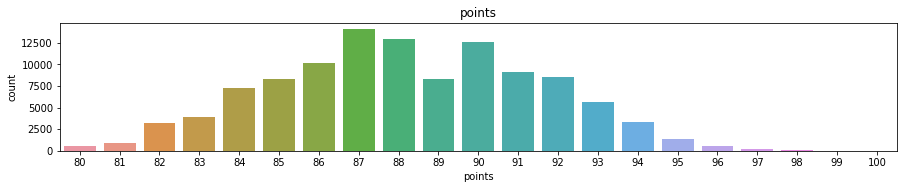

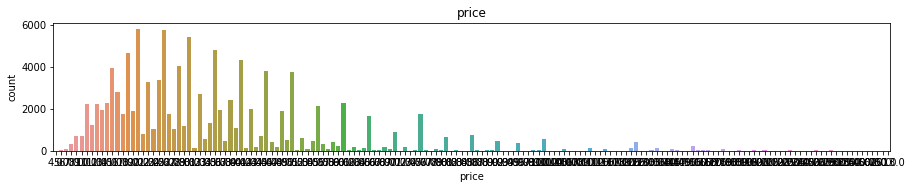

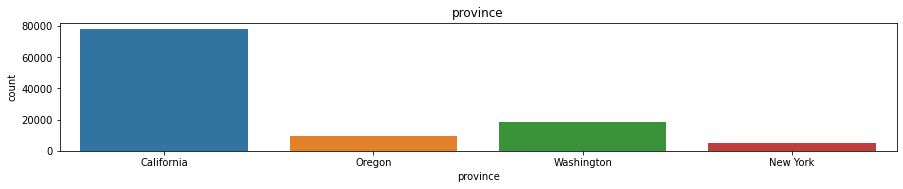

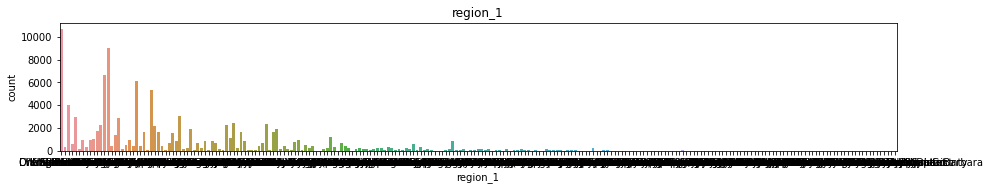

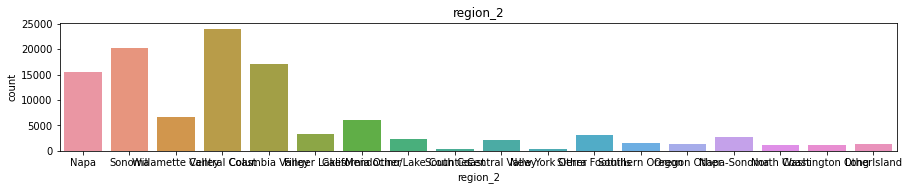

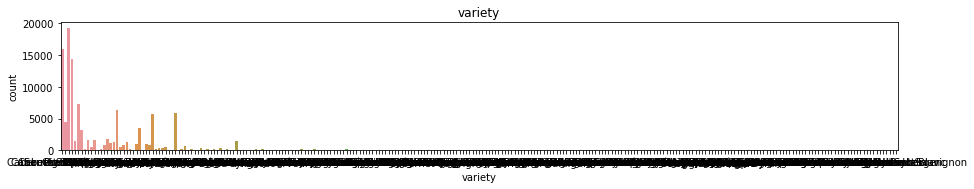

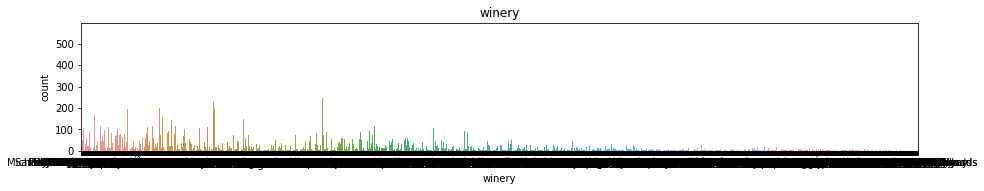

In [28]:
plt.figure(figsize=(15,8))
plt.subplot(311)
sns.countplot(x = new_data.points)
plt.title('points')
plt.show()
plt.figure(figsize=(15,8))
plt.subplot(313)
sns.countplot(x = new_data.price)
plt.title('price')
plt.show()
plt.figure(figsize=(15,8))
plt.subplot(313)
sns.countplot(x = new_data.province)
plt.title('province')
plt.show()
plt.figure(figsize=(15,8))
plt.subplot(313)
sns.countplot(x = new_data.region_1)
plt.title('region_1')
plt.show()
plt.figure(figsize=(15,8))
plt.subplot(313)
sns.countplot(x = new_data.region_2)
plt.title('region_2')
plt.show()
plt.figure(figsize=(15,8))
plt.subplot(313)
sns.countplot(x = new_data.variety)
plt.title('variety')
plt.show()
plt.figure(figsize=(15,8))
plt.subplot(313)
sns.countplot(x = new_data.winery)
plt.title('winery')
plt.show()

### 2.2 频繁模式挖掘与可视化展示
全域集合中的每一个元素都有一个布尔变量，表示该元素是否出现，那么每一个子集可用布尔向量表示。分析布尔向量，即可得到反映元素<b>频繁关联</b>的模式。

频繁模式挖掘最终可得到<b>频繁项集</b>（frequent itemset）。

此处设定本数据集的最小支持度为2%。

In [16]:
listToAnalysis = []
listToStore = []
# country  designation  points  price  province  region_1  region_2  variety  winery
for i in range(new_data.iloc[:, 0].size):
    temp = new_data.iloc[i]['points']
    listToStore.append(temp)
    temp = new_data.iloc[i]['price']
    if temp <= 50:
        temp = 'price_0_50'
    elif 50 < temp <= 100:
        temp = 'price_50_100'
    elif 100 < temp <= 200:
        temp = 'price_100_200'
    elif temp > 200:
        temp = 'price_200'
    listToStore.append(temp)
    temp = new_data.iloc[i]['province']
    listToStore.append(temp)
    temp = new_data.iloc[i]['region_2']
    listToStore.append(temp)
    temp = new_data.iloc[i]['variety']
    listToStore.append(temp)
    temp = new_data.iloc[i]['winery']
    listToStore.append(temp)
    listToAnalysis.append(listToStore.copy())
    listToStore.clear()

In [9]:
strSet = set(functools.reduce(lambda a, b: a + b, listToAnalysis))
strEncode = dict(zip(strSet, range(len(strSet))))
strDecode = dict(zip(strEncode.values(), strEncode.keys()))
listToAnalysis_int = [list(map(lambda item: strEncode[item], row)) for row in listToAnalysis]

In [10]:
result = oaf.frequent_itemsets(listToAnalysis_int , .02) #支持度
itemsets = dict(result)

In [60]:
# 输出结果：[频繁项，支持度]
items = []
for i in itemsets:
    temStr = ''
    for j in i:
        temStr = temStr+str(strDecode[j])+' & '
    temStr = temStr[:-3]
    items.append([temStr, round(itemsets[i]/N, 4)])
    temStr = temStr + ': '+ str(round(itemsets[i]/N, 4))
    # print(temStr)
# print(type(items[:2]))
tmp = list(map(lambda x:x[1],items))
# print(tmp)
pd.set_option('display.max_rows',500)
df = pd.DataFrame(items, columns=['频繁项集', '支持度']) 
df = df.sort_values('支持度',ascending=False)
df.index = range(len(df))
df

,频繁项集,支持度
0,price_0_50,0.8454
1,California,0.7036
2,California & price_0_50,0.5778
3,Central Coast,0.2159
4,California & Central Coast,0.2159
5,price_0_50 & Central Coast,0.1907
6,California & price_0_50 & Central Coast,0.1907
7,Sonoma,0.1822
8,California & Sonoma,0.1822
9,Pinot Noir,0.1728


频繁项集支持度可视化展示如下：

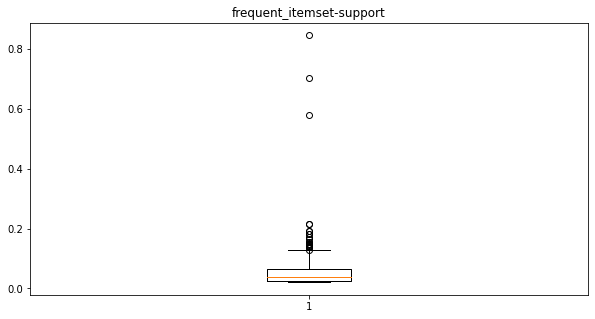

In [88]:
plt.figure(figsize=(10,5))
# plt.subplot(131)
plt.boxplot(tmp)
plt.title('frequent_itemset-support')
plt.show()

### 2.3 关联规则挖掘、支持度计算、置信度计算与可视化展示
- 全域集合中的每一个元素都有一个布尔变量，表示该元素是否出现，那么每一个子集可用布尔向量表示。分析布尔向量，即可得到反映元素<b>频繁关联</b>的模式。这些模式可以用<b>关联规则</b>的形式表示。</p>
   * 支持度（support）：规则兴趣度的度量，反映所发现规则的有用性。
$$ support(A=>B) = P(A \cup B) $$
   * 置信度（confidence）：规则兴趣度的度量，反映所发现规则的确定性。
$$confidence(A=>B) = P(B|A) = \frac{support(A \cup B)}{support(A)} = \frac{support\_count(A \cup B)}{support\_count(A)}$$
</p>
- 挖掘关联规则的问题可以归结为挖掘频繁项集。</p>

- 关联规则的挖掘是一个两步的过程：
    1. <b>找出所有的频繁项集</b>：根据定义，这些项集的每一个频繁出现的次数至少与预定义的最小支持计数$min\_sup$一样。<b>该部分内容已在2.2小节完成。</b>
    2. <b>由频繁项集产生强关联规则</b>：根据定义，这些规则必须满足最小支持度和最小置信度。
    
此处设定本数据集的最小支持度为2%，最小置信度为50%。

In [12]:
rules = oaf.association_rules(itemsets, .5)   #置信度
rules = list(rules)

In [90]:
# Rules(规则前项，规则后项，支持度，置信度)
returnRules = []
for i in rules:
    temStr = '';
    for j in i[0]:   #处理第一个frozenset
        temStr = temStr+str(strDecode[j])+' & '
    temStr = temStr[:-3]
    temStr = temStr + ' ==> '
    for j in i[1]:
        temStr = temStr+strDecode[j]+' & '
    temStr = temStr[:-3]
    returnRules.append([temStr, round(i[2]/N, 4), round(i[3], 4)])
    temStr = temStr + ';' +'\t'+str(i[2])+ ';' +'\t'+str(i[3])
df = pd.DataFrame(returnRules, columns=['关联规则', '支持度', '置信度']) 
support = list(map(lambda x:x[1],returnRules))
confidence = list(map(lambda x:x[2],returnRules))
df = df.sort_values('置信度',ascending=False)
df.index = range(len(df))
df

,关联规则,支持度,置信度
0,Pinot Noir & price_0_50 & Central Coast ==> Ca...,0.0378,1.0000
1,90 & Sonoma ==> California,0.0232,1.0000
2,Columbia Valley & 88 ==> Washington,0.0250,1.0000
3,88 & Central Coast ==> California,0.0220,1.0000
4,87 & Sonoma ==> California,0.0243,1.0000
5,87 & Central Coast ==> California,0.0263,1.0000
6,Chardonnay & Sonoma ==> California,0.0337,1.0000
7,Chardonnay & Central Coast ==> California,0.0358,1.0000
8,Napa & price_50_100 ==> California,0.0447,1.0000
9,price_50_100 & Sonoma ==> California,0.0312,1.0000


关联规则的支持度与置信度可视化展示如下：

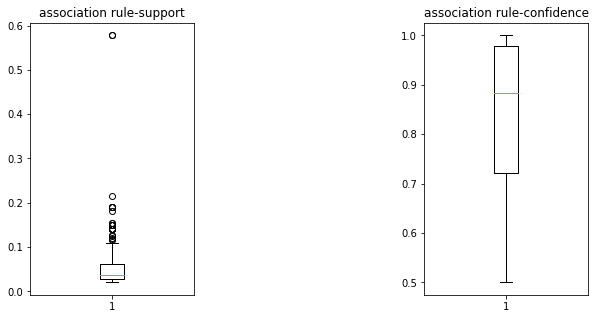

In [77]:
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.boxplot(support)
plt.title('association rule-support')
# plt.show()
# plt.figure(figsize=(10,5))
plt.subplot(133)
plt.boxplot(confidence)
plt.title('association rule-confidence')
plt.show()

### 2.4 关联规则评价与可视化展示

采用相关性系数$lift$（提升度）与$Leverage$进行关联规则评价。

In [14]:
results = list(oaf.rules_stats(rules, itemsets, len(listToAnalysis)))

In [80]:
resultsRules = []
for i in results:
    temStr = '';
    for j in i[0]:   #处理第一个frozenset
        temStr = temStr+str(strDecode[j])+' & '
    temStr = temStr[:-3]
    temStr = temStr + ' ==> '
    for j in i[1]:
        temStr = temStr+strDecode[j]+' & '
    temStr = temStr[:-3]
    resultsRules.append([temStr, round(i[2]/N, 4), round(i[3], 4), round(i[6], 4), round(i[7], 4)])
    temStr = temStr + ';' +'\t'+str(i[2])+ ';' +'\t'+str(i[3])+ ';' +'\t'+str(i[6])+ ';' +'\t'+str(i[7])
df = pd.DataFrame(resultsRules, columns=['关联规则', '支持度', '置信度', 'lift', 'Leverage']) 
support_show = list(map(lambda x:x[1],resultsRules))
confidence_show = list(map(lambda x:x[2],resultsRules))
lift_show = list(map(lambda x:x[3],resultsRules))
leverage_show = list(map(lambda x:x[4],resultsRules))
df = df.sort_values('lift',ascending=False)
df.index = range(len(df))
df

,关联规则,支持度,置信度,lift,Leverage
0,Finger Lakes ==> New York & price_0_50,0.0292,0.9914,21.9390,0.0279
1,New York & price_0_50 ==> Finger Lakes,0.0292,0.6465,21.9390,0.0279
2,New York ==> price_0_50 & Finger Lakes,0.0292,0.6370,21.8024,0.0279
3,New York ==> Finger Lakes,0.0295,0.6425,21.8024,0.0281
4,Finger Lakes ==> New York,0.0295,1.0000,21.8024,0.0281
5,price_0_50 & Finger Lakes ==> New York,0.0292,1.0000,21.8024,0.0279
6,Pinot Noir & Oregon ==> Willamette Valley,0.0398,0.8851,14.9261,0.0372
7,Willamette Valley ==> Pinot Noir & Oregon,0.0398,0.6718,14.9261,0.0372
8,Willamette Valley ==> Pinot Noir & price_0_50 ...,0.0296,0.5000,14.5626,0.0276
9,Pinot Noir & price_0_50 & Oregon ==> Willamett...,0.0296,0.8636,14.5626,0.0276


关联规则评价（$lift$ 和 $Leverage$）可视化展示如下：

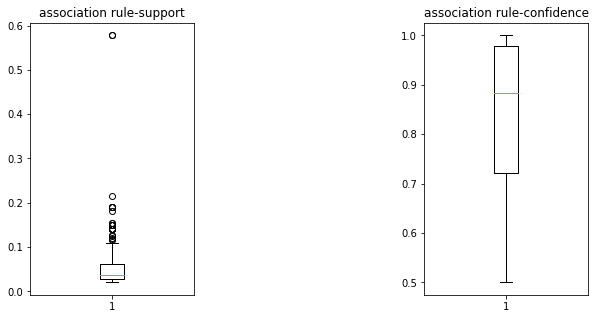

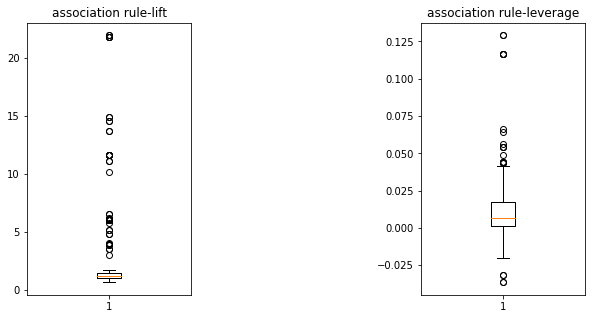

In [83]:
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.boxplot(support_show)
plt.title('association rule-support')
# plt.show()
# plt.figure(figsize=(10,5))
plt.subplot(133)
plt.boxplot(confidence_show)
plt.title('association rule-confidence')
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(131)
plt.boxplot(lift_show)
plt.title('association rule-lift')
# plt.show()
# plt.figure(figsize=(10,5))
plt.subplot(133)
plt.boxplot(leverage_show)
plt.title('association rule-leverage')
plt.show()

### 2.5 挖掘结果分析
  经过预处理后，保留的数据均为US的葡萄酒的数据。   

  根据频繁项集的结果可以看出，约85%的葡萄酒的价格在50以内，约%14的葡萄酒的价格在50到100,约1%的葡萄酒的价格超过100；70%的葡萄酒来自California, 16%的葡萄酒来自Washington；在价格不超过50的葡萄酒中，约68%的葡萄酒来自California，约18%的葡萄酒来自Washington；约17%的葡萄酒是由Pinot Noir酿造的；评分为87的葡萄酒中约90%的价格不超过50，评分为88的葡萄酒中约91%的价格不超过50，评分为90的葡萄酒中约84%的价格不超过50。   

  根据关联规则的结果可以看出，99%由Sauvignon Blanc、Riesling酿造的葡萄酒的价格在50以内；约98%的评分为82、83的葡萄酒的价格在50以内，约96%的评分为84、85的葡萄酒的价格在50以内，约89%的评分为89的葡萄酒的价格在50以内，可以看出，随着评分的提升，葡萄酒价格在50以内的占比越来越少，说明随着评分提高，葡萄酒的价格也相对提升。